In [1]:
from google.colab import drive
drive.mount('/content/drive')

%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Fakenews/train.csv'
# test_path = '/content/drive/MyDrive/Fakenews/test.csv'

df = pd.read_csv(path)
df.head(5)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [2]:
print(df.shape)
df.isna().sum()

(20800, 5)


id           0
title      558
author    1957
text        39
label        0
dtype: int64

,title,label
0,La Federación de Atletismo considerará maricón...,1
1,World War 3 Alert U S Navy’s new $20 billion W...,1
2,"Disappointing 2nd-Quarter Growth, Despite Stro...",0
3,Kim Jong-nam Killing Was ‘Terrorist Act’ by No...,0
4,ALERT: “Most Systemically Dangerous Banks are ...,1
...,...,...
20237,Nearly All U.S. Banks Pass Fed’s Stress Test -...,0
20238,"World Champion Boxer Manny Pacquiao Builds 1,0...",1
20239,“Do Not Fuck This Up” America Told,1
20240,Is Edward Snowden a Spy? A New Book Calls Him ...,0


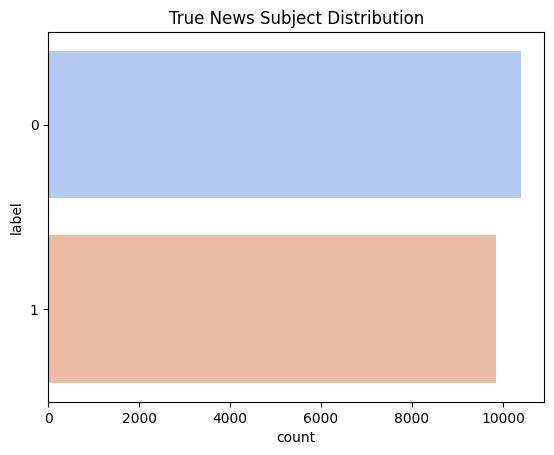

In [3]:
from sklearn.utils import shuffle

df = df[~df['title'].isna()][['title','label']]

# Shuffle
df = shuffle(df).reset_index(drop=True)

display(df)
sns.countplot(y="label", palette="coolwarm", data=df).set_title('True News Subject Distribution')
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20242 entries, 0 to 20241
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20242 non-null  object
 1   label   20242 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 316.4+ KB


In [5]:
df.drop_duplicates(subset=['title'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 20241
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   19803 non-null  object
 1   label   19803 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 464.1+ KB


In [6]:
display(df)

,title,label
0,La Federación de Atletismo considerará maricón...,1
1,World War 3 Alert U S Navy’s new $20 billion W...,1
2,"Disappointing 2nd-Quarter Growth, Despite Stro...",0
3,Kim Jong-nam Killing Was ‘Terrorist Act’ by No...,0
4,ALERT: “Most Systemically Dangerous Banks are ...,1
...,...,...
20237,Nearly All U.S. Banks Pass Fed’s Stress Test -...,0
20238,"World Champion Boxer Manny Pacquiao Builds 1,0...",1
20239,“Do Not Fuck This Up” America Told,1
20240,Is Edward Snowden a Spy? A New Book Calls Him ...,0


In [7]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

for i in range(len(df['title'])):
  title = df.iloc[i]['title']
  title = re.sub(r'http\S+', '', title)
  title = re.sub(r'www\S+', '', title)
  # title = re.sub('[^a-zA-Z]', ' ', title)
  title = re.sub(r'[^\w\s]', ' ', title)
  title = title.lower()
  title = title.split()
  title = [lemmatizer.lemmatize(w) for w in title if not w in stop_words]
  title = ' '.join(title)
  df.at[df.index[i], 'title'] = title

display(df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,title,label
0,la federación de atletismo considerará maricón...,1
1,world war 3 alert u navy new 20 billion weapon...,1
2,disappointing 2nd quarter growth despite stron...,0
3,kim jong nam killing terrorist act north korea...,0
4,alert systemically dangerous bank largest silv...,1
...,...,...
20237,nearly u bank pas fed stress test new york time,0
20238,world champion boxer manny pacquiao build 1 00...,1
20239,fuck america told,1
20240,edward snowden spy new book call one new york ...,0


In [8]:
empty_title_mask = (df['title'] == '') | (df['title'].isnull())
df.drop(df[empty_title_mask].index, inplace=True)

display(df)

,title,label
0,la federación de atletismo considerará maricón...,1
1,world war 3 alert u navy new 20 billion weapon...,1
2,disappointing 2nd quarter growth despite stron...,0
3,kim jong nam killing terrorist act north korea...,0
4,alert systemically dangerous bank largest silv...,1
...,...,...
20237,nearly u bank pas fed stress test new york time,0
20238,world champion boxer manny pacquiao build 1 00...,1
20239,fuck america told,1
20240,edward snowden spy new book call one new york ...,0


In [9]:
train_val_df = df.sample(frac = 0.8)
test_df = df.drop(train_val_df.index)

train_df = train_val_df.sample(frac = 0.875)
val_df = train_val_df.drop(train_df.index)

# Reset Index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)
print('testset size:', test_df.shape)

trainset size: (13858, 2)
valset size: (1980, 2)
testset size: (3960, 2)


In [10]:
train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)

In [11]:
!pip install transformers
import torch
from transformers import BertTokenizer
PRETRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.1 MB/s eta 0:00:00


In [12]:
from torch.utils.data import Dataset

class FakeNewsDataset(Dataset):
    def __init__(self, mode, tokenizer):
        assert mode in ['train', 'val', 'test']
        self.mode = mode
        self.df = pd.read_csv(mode + '.tsv', sep='\t').fillna("")
        self.len = len(self.df)
        self.tokenizer = tokenizer  # BERT tokenizer

    def __getitem__(self, idx):
        if self.mode == 'test':
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)
        else:
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)

        word_pieces = ['[CLS]']
        statement = self.tokenizer.tokenize(statement)
        word_pieces += statement + ['[SEP]']
        len_st = len(word_pieces)

        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)

        segments_tensor = torch.tensor([0] * len_st, dtype=torch.long)
        
        return (tokens_tensor, segments_tensor, label_tensor)
    
    def __len__(self):
        return self.len
    
    
# Initialize Datasets for Transformation
trainset = FakeNewsDataset('train', tokenizer=tokenizer)
valset = FakeNewsDataset('val', tokenizer=tokenizer)
testset = FakeNewsDataset('test', tokenizer=tokenizer)

print('trainset size:' ,trainset.__len__())
print('valset size:',valset.__len__())
print('testset size: ',testset.__len__())

trainset size: 13858
valset size: 1980
testset size:  3960


In [13]:
sample_idx = 0

statement, label = trainset.df.iloc[sample_idx].values

tokens_tensor, segments_tensor, label_tensor = trainset[sample_idx]

tokens = tokenizer.convert_ids_to_tokens(tokens_tensor.tolist())
combined_text = " ".join(tokens)

print(f"""
original_statement: 
{statement}

tokens: 
{tokens}

label: {label}

--------------------

tokens_tensor: 
{tokens_tensor}

segments_tensor: 
{segments_tensor}

label_tensor: 
{label_tensor}

""")


original_statement: 
malaysia dump u chinese naval vessel

tokens: 
['[CLS]', 'malaysia', 'dump', 'u', 'chinese', 'naval', 'vessel', '[SEP]']

label: 1

--------------------

tokens_tensor: 
tensor([  101,  6027, 15653,  1057,  2822,  3987,  6258,   102])

segments_tensor: 
tensor([0, 0, 0, 0, 0, 0, 0, 0])

label_tensor: 
1




In [14]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

def create_mini_batch(samples):
    tokens_tensors = [s[0] for s in samples]
    segments_tensors = [s[1] for s in samples]

    if samples[0][2] is not None:
        label_ids = torch.stack([s[2] for s in samples])
    else:
        label_ids = None
    
    # Zero Padding
    tokens_tensors = pad_sequence(tokens_tensors, batch_first=True)
    segments_tensors = pad_sequence(segments_tensors, batch_first=True)

    masks_tensors = torch.zeros(tokens_tensors.shape, dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(tokens_tensors != 0, 1)
    
    return tokens_tensors, segments_tensors, masks_tensors, label_ids


BATCH_SIZE = 16
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
valloader = DataLoader(valset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
testloader = DataLoader(testset, batch_size=BATCH_SIZE,collate_fn=create_mini_batch)

In [15]:
data = next(iter(trainloader))

tokens_tensors, segments_tensors, masks_tensors, label_ids = data

In [16]:
from transformers import BertForSequenceClassification
from IPython.display import display, clear_output

PRETRAINED_MODEL_NAME = "bert-base-uncased"
NUM_LABELS = 2

model = BertForSequenceClassification.from_pretrained(
    PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS)

clear_output()

In [17]:
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm
import time

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)
model = model.to(device)

model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
NUM_EPOCHS = 3
start_time = time.time()
for epoch in range(NUM_EPOCHS):
    train_loss = 0.0
    train_acc = 0.0

    loop = tqdm(trainloader)
    for batch_idx, data in enumerate(loop):
        tokens_tensors, segments_tensors, masks_tensors, labels = [t.to(device) for t in data]

        optimizer.zero_grad()
        
        outputs = model(input_ids=tokens_tensors, 
                        token_type_ids=segments_tensors, 
                        attention_mask=masks_tensors, 
                        labels=labels)
        loss = outputs[0]
        loss.backward()
        optimizer.step()

        logits = outputs[1]
        _, pred = torch.max(logits.data, 1)
        train_acc = accuracy_score(pred.cpu().tolist() , labels.cpu().tolist())

        train_loss += loss.item()

        loop.set_description(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
        loop.set_postfix(acc = train_acc, loss = train_loss)

end_time = time.time()
training_time = end_time - start_time

device: cuda:0


  0%|          | 0/867 [00:00<?, ?it/s]

  0%|          | 0/867 [00:00<?, ?it/s]

  0%|          | 0/867 [00:00<?, ?it/s]

In [18]:
torch.save(model, './best_model.pth')

BERT Model Accuracy :  0.9419191919191919
Precision :  0.9371035940803383
Recall :  0.9410828025477707
F1 :  0.9390889830508475
G-mean: 0.941880177148348
Training time:  299.24626207351685
Inference time:  7.733650207519531
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2076
           1       0.94      0.94      0.94      1884

    accuracy                           0.94      3960
   macro avg       0.94      0.94      0.94      3960
weighted avg       0.94      0.94      0.94      3960



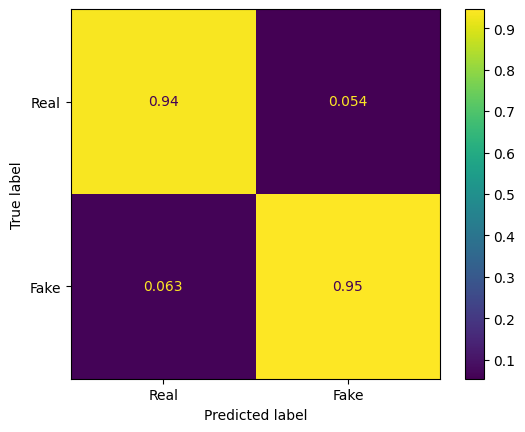

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.metrics import geometric_mean_score
true=[]
predictions=[]
start_time = time.time()
with torch.no_grad():
    model.eval()
    for data in testloader:
        if next(model.parameters()).is_cuda:
            data = [t.to(device) for t in data if t is not None]
            
        tokens_tensors, segments_tensors, masks_tensors = data[:3]
        test_outputs = model(input_ids=tokens_tensors, 
                    token_type_ids=segments_tensors, 
                    attention_mask=masks_tensors)

        logits = test_outputs[0]
        _, pred = torch.max(logits.data, 1)

        labels = data[3]
        true.extend(labels.cpu().tolist())
        predictions.extend(pred.cpu().tolist())

end_time = time.time()
inference_time = end_time - start_time
cm = confusion_matrix(true, predictions, labels=[1, 0], normalize='pred')

accuracy = accuracy_score(true, predictions)

g_mean = geometric_mean_score(true, predictions)
print("BERT Model Accuracy : ", accuracy)
print("Precision : ", precision_score(true, predictions))
print("Recall : ", recall_score(true, predictions))
print("F1 : ", f1_score(true, predictions))
print("G-mean:", g_mean)
print("Training time: ", training_time)
print("Inference time: ", inference_time)
print(classification_report(true, predictions))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real','Fake'])
disp.plot()